In [1]:
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
import pandas as pd

In [ ]:
list_fasta = list(SeqIO.parse("df1.fasta", "fasta"))


In [10]:
with open("bugstuff.aln", "r") as aln:
    alignment = AlignIO.read(aln, "clustal")

In [11]:
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [12]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')

In [ ]:
distance_matrix = calculator.get_distance(alignment)

In [14]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [15]:
bug_tree = constructor.build_tree(alignment)
bug_tree.rooted = True
print(bug_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner122')
        Clade(branch_length=0.0005457698883205679, name='Inner121')
            Clade(branch_length=0.004631931479173398, name='Inner117')
                Clade(branch_length=0.025079888335387133, name='Inner94')
                    Clade(branch_length=0.025488637108620052, name='Inner88')
                        Clade(branch_length=0.011283357448847744, name='Inner86')
                            Clade(branch_length=0.10043540901961427, name='KROK014-19')
                            Clade(branch_length=0.009277369920413628, name='Inner85')
                                Clade(branch_length=0.002697963472383255, name='Inner84')
                                    Clade(branch_length=0.07071878660843402, name='KROK010-19')
                                    Clade(branch_length=0.0021924320108128587, name='Inner83')
                                        Clade(branch_length=0.007150760155841415, name='Inner78')
            

In [16]:
Phylo.write(bug_tree, "bug_tree.xml", "phyloxml")

1

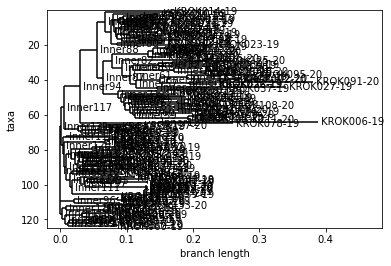

In [20]:
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(bug_tree)

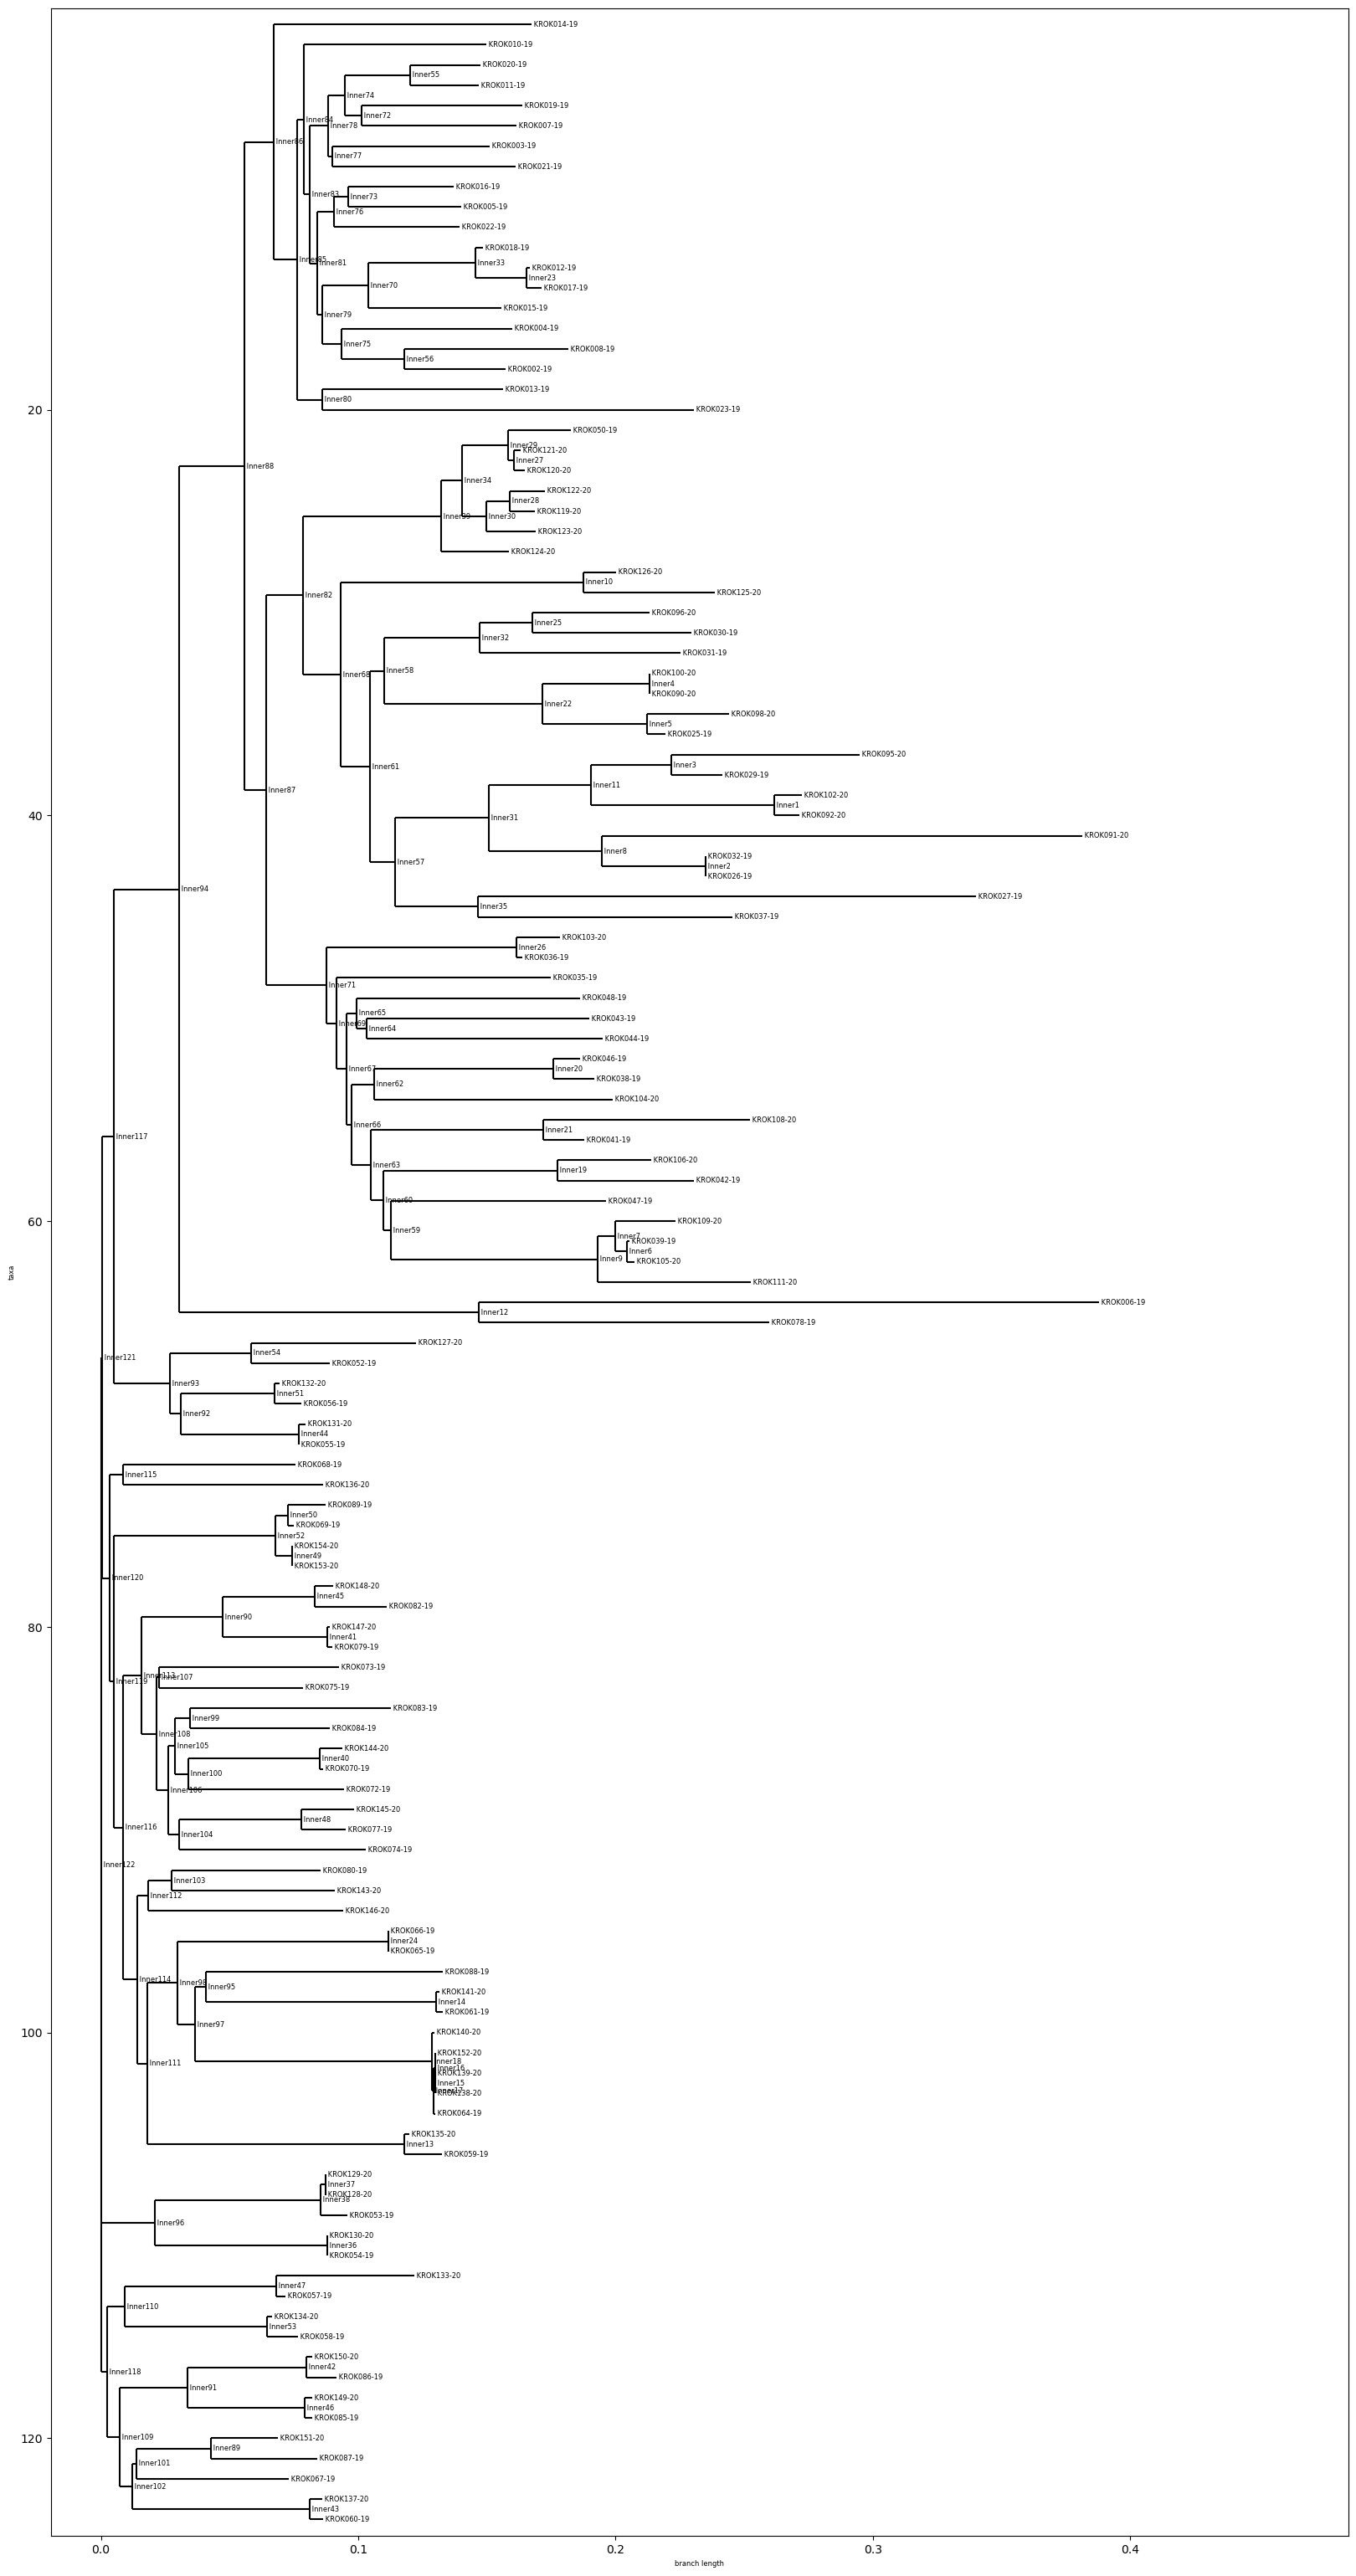

In [27]:
fig = plt.figure(figsize=(20, 40), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=6)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#bug_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(bug_tree, axes=axes)
fig.savefig("bug_cladogram")

In [30]:
Phylo.convert("bug_tree.xml", "phyloxml", "bug_tree.nex", "nexus")

1

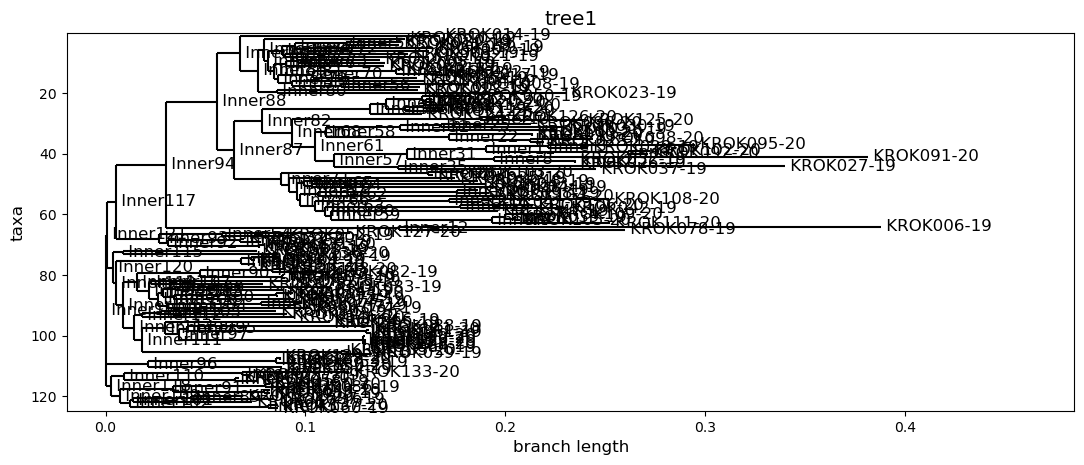

In [32]:
bug_nex = Phylo.read("bug_edited.nex", "nexus")

fig = plt.figure(figsize=(13, 5), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=12)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
#bug_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(bug_nex, axes=axes)
fig.savefig("bug2_cladogram")